<a href="https://colab.research.google.com/github/yashasvimisra2798/NamedEntityRecognition/blob/master/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.2.0
GPU detected: []


In [65]:
data=pd.read_csv('ner_dataset.csv',encoding='unicode_escape')
data=data.fillna(method='ffill')
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [66]:


print("Unique Words In Corpous:",data['Word'].nunique())
print("Unique Words In Corpous:",data['Tag'].nunique())

Unique Words In Corpous: 35178
Unique Words In Corpous: 17


In [0]:


words=list(set(data["Word"].values))
words.append("ENDPAD")
num_words=len(words)

In [0]:

tags=list(set(data["Tag"].values))
num_tags=len(tags)

In [69]:
num_words,num_tags

(35179, 17)

Retrieve Sentences and their corresponding Tags

In [0]:
class SentenceGetter(object):
     def __init__(self,data):
        self.n_sent = 1
        self.data = data
        agg_func = lambda s: [(w,p,t) for w,p,t in zip(s["Word"].values.tolist(),
                                                       s["POS"].values.tolist(), 
                                                       s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [0]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [72]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [73]:

sentences[1]

[('Iranian', 'JJ', 'B-gpe'),
 ('officials', 'NNS', 'O'),
 ('say', 'VBP', 'O'),
 ('they', 'PRP', 'O'),
 ('expect', 'VBP', 'O'),
 ('to', 'TO', 'O'),
 ('get', 'VB', 'O'),
 ('access', 'NN', 'O'),
 ('to', 'TO', 'O'),
 ('sealed', 'JJ', 'O'),
 ('sensitive', 'JJ', 'O'),
 ('parts', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('plant', 'NN', 'O'),
 ('Wednesday', 'NNP', 'B-tim'),
 (',', ',', 'O'),
 ('after', 'IN', 'O'),
 ('an', 'DT', 'O'),
 ('IAEA', 'NNP', 'B-org'),
 ('surveillance', 'NN', 'O'),
 ('system', 'NN', 'O'),
 ('begins', 'VBZ', 'O'),
 ('functioning', 'VBG', 'O'),
 ('.', '.', 'O')]

Define Mapings Between Sentences and Tags

In [0]:
word2idx = {w: i+1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t, in enumerate(tags)}

In [75]:
word2idx

{'80-percent': 1,
 'Color': 2,
 'Chinnawat': 3,
 'immensely': 4,
 'Yuanmu': 5,
 'Mende': 6,
 'Shirts': 7,
 'Loan': 8,
 'devised': 9,
 'preventative': 10,
 'POMEGRANATE': 11,
 'Clean': 12,
 'Past': 13,
 'umpire': 14,
 '534': 15,
 'Water': 16,
 'theory': 17,
 'inexpensive': 18,
 'Arjangi': 19,
 'Ventura': 20,
 'Sibneft': 21,
 'rebel-held': 22,
 'favourite': 23,
 'identity': 24,
 'staunchly': 25,
 'bastion': 26,
 'Bittok': 27,
 'Loving': 28,
 'harangued': 29,
 'Yoadimnadji': 30,
 'Josslyn': 31,
 'harmful': 32,
 'mischief': 33,
 'Friedan': 34,
 'Caspian': 35,
 '1,500-meters': 36,
 'Mayor': 37,
 'Envious': 38,
 'Tamin': 39,
 'hauled': 40,
 'Qinghai': 41,
 'post-war': 42,
 'ordinary': 43,
 'caps': 44,
 'firehouses': 45,
 'René': 46,
 'rode': 47,
 'Sixto': 48,
 'indicates': 49,
 'decades': 50,
 '159th': 51,
 'alleviation': 52,
 'Obita': 53,
 'renovating': 54,
 'marveled': 55,
 'Inaccessible': 56,
 'Cesme': 57,
 'countdown': 58,
 '324': 59,
 'translation': 60,
 'Eni': 61,
 'betrayal': 62,
 'ta

Padding Input Sentences and Creating Train/Test Splits

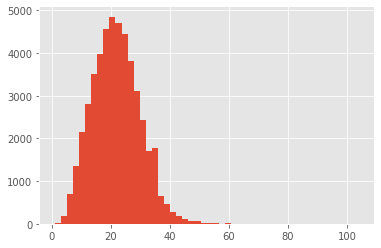

In [76]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
max_len = 50
X = [[word2idx[w[0]]for w in s]for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding='post', value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding='post', value=tag2idx["O"])
y = [to_categorical(i, num_classes=num_tags)for i in y]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1)

Build and compile a Bidirectional LSTM Model

In [0]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [80]:
input_word = Input(shape=(max_len))
model = Embedding(input_dim=num_words, output_dim=max_len, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation='softmax'))(model)
model=Model(input_word, out)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 50, 50)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 200)           120800    
_________________________________________________________________
time_distributed_4 (TimeDist (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

In [0]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, verbose=0, mode='max', restore_best_weights=False)

In [84]:
callbacks = [PlotLossesCallback(), early_stopping]
history = model.fit(
    x_train, np.array(y_train), 
    validation_split=0.2,
    batch_size=32,
    epochs=3,
    verbose=1
)

Epoch 1/3
1080/1080 [==============================] - 209s 193ms/step - loss: 0.1953 - accuracy: 0.9549 - val_loss: 0.0707 - val_accuracy: 0.9799
Epoch 2/3
1080/1080 [==============================] - 209s 193ms/step - loss: 0.0546 - accuracy: 0.9840 - val_loss: 0.0523 - val_accuracy: 0.9843
Epoch 3/3
1080/1080 [==============================] - 209s 194ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0480 - val_accuracy: 0.9854


Evaluate Named Entity Recognition Model

In [85]:
model.evaluate(x_test, np.array(y_test))

150/150 [==============================] - 4s 26ms/step - loss: 0.0493 - accuracy: 0.9853


[0.04926556348800659, 0.9852668642997742]

In [90]:
i=np.random.randint(0, x_test.shape[0])
p=model.predict(np.array([x_test[i]]))
p=np.argmax(p,axis=-1)

y_true=np.argmax(np.array(y_test), axis=-1)[i]
print("{:15}{:5}\t {}\n".format("Word","True","Pred"))
print("-"*30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
  print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
The            O	O
Vatican        B-org	B-org
has            O	O
announced      O	O
that           O	O
U.S.           B-org	B-geo
President      B-per	B-per
George         I-per	I-per
Bush           I-per	I-per
will           O	O
meet           O	O
with           O	O
Pope           O	O
Benedict       B-per	I-per
in             O	O
June           B-tim	B-tim
.              O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenths   O	O
three-tenth